If you work from collab, write "1" below, from pc - "0"

In [44]:
while True:
    print("Please Select if you want work from: \n 0 - home pc \n 1 - colab :") 
    selection = input()
    if selection == '0': 
        colab = 0
        print("You want work from pc")
        break
    elif selection =='1': 
        colab = 1
        print("You will work from colab\n")
        break
    else: 
        print("Unknown Option Selected! Only 0 or 1 accepted")

Please Select if you want work from: 
 0 - home pc 
 1 - colab :
You want work from pc


# Wikipedia: blocking of users and policies


##Useful libraries

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv 
import json

## Plot functions

In [46]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'

In [47]:
def show_plot_1(x, y, my_title = "", my_xlabel = "", my_ylabel = ""):
    plt.figure(figsize=(21, 8))
    plt.plot(x, y)
    
    plt.title(my_title)
    plt.xlabel(my_xlabel)
    plt.ylabel(my_ylabel)

    plt.show()

In [48]:
def show_plot_2(x1,y1, x2,y2, my_title = "", my_xlabel = "", my_ylabel = "", legend_1="", legend_2=""):
    fig, ax = plt.subplots(figsize=(21, 8))
    
    ax.plot(x1, y1, color='blue')
    ax.plot(x2, y2, color='red')
    plt.legend([legend_1, legend_2], loc=0)

    plt.title(my_title)
    plt.xlabel(my_xlabel)
    plt.ylabel(my_ylabel)

    plt.show()

## Read files from colab/pc - select!

In [49]:
# if you run in colab - use this to connect to folders (which is not available now, would you please skip to the next block?)
print(colab)
if colab == 1:
    from google.colab import drive
    drive.mount('/content/drive/')
    # no space in the root name folder
    %cd drive/MyDrive/Wikipedia-Block-log/
    # path to the original data folder and results folder
    folder = 'data_original/' 
    folder_result = 'data_results/' 
elif colab == 0:
    # path to the original data folder and results folder
    folder = '../data_original/' 
    folder_result = '../data_results/' 

0


In [50]:
# path to the original data folder and results folder (for now)
folder = 'data_original/' 
folder_result = 'data_results/'  

In [51]:
file = 'freq_policies_monthly.csv'
freq_policies_monthly = pd.read_csv(folder + file)
freq_policies_monthly['month'] = pd.to_datetime(freq_policies_monthly['month'])

In [52]:
file = 'MonthlyEditAndEditorsFrom2004-2017.csv'
wiki_data_full = pd.read_csv(folder + file)

In [53]:
file = 'block_log_data_new.csv'
df = pd.read_csv(folder + file)
df['timestamp'] = pd.to_datetime(df['timestamp'])

/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_34102/129992704.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + file)


### First glance at the data
When we first conducted our analysis (Dec 2022) our original dataframe had:
- 8 columns: title, action, user, timestamp, comment, duration, flags, expiry
- 4202626 entries (years 2004 to 2017)
- first timestamp: 2004-12-23 00:00:00, last timestamp: 2017-12-31 00:00:00

We later removed the year 2004 which held to few data to be relevant.

In [54]:
df.head()

,title,action,user,timestamp,comment,duration,flags,expiry
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,NaN,NaN
1,Dori,block,Dori,2004-12-23,testing,infinity,NaN,NaN
2,Brion VIBBER,block,Brion VIBBER,2004-12-23,testing,infinity,NaN,NaN
3,#13255,unblock,Angela,2004-12-23,me,NaN,NaN,NaN
4,#13254,unblock,Angela,2004-12-23,NaN,NaN,NaN,NaN


**title** = the user being blocked

**action** = block or unblock - we will only focus on block

**user** = the person (administrator) implementing the block

**timestamp** = the block event date

**comment** = blocking rationale

**duration** = blocking scheduled duration

**flag** = mysterious information

**expiry** = sometimes, a timestamp

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424000 entries, 0 to 6423999
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   title      object        
 1   action     object        
 2   user       object        
 3   timestamp  datetime64[ns]
 4   comment    object        
 5   duration   object        
 6   flags      object        
 7   expiry     object        
dtypes: datetime64[ns](1), object(7)
memory usage: 392.1+ MB


In [56]:
df.describe()

,timestamp
count,6424000
mean,2011-07-31 23:30:39.196514304
min,2004-12-23 00:00:00
25%,2008-02-26 00:00:00
50%,2010-11-02 00:00:00
75%,2015-02-16 00:00:00
max,2017-12-31 00:00:00


In [57]:
# change the column name for administrators/bot_administrators/bots from "user" to "administrator"
# change the column name for editors from "title" to "users"
df = df.rename(columns={"user": "administrator"})
df = df.rename(columns={"title": "users"})

In [58]:
df

,users,action,administrator,timestamp,comment,duration,flags,expiry
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,NaN,NaN
1,Dori,block,Dori,2004-12-23,testing,infinity,NaN,NaN
2,Brion VIBBER,block,Brion VIBBER,2004-12-23,testing,infinity,NaN,NaN
3,#13255,unblock,Angela,2004-12-23,me,NaN,NaN,NaN
4,#13254,unblock,Angela,2004-12-23,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6423995,AspenSavannah,block,Alexf,2017-12-31,{{uw-softerblock}},infinity,"['""noautoblock""']",NaN
6423996,180.254.111.224,unblock,KrakatoaKatie,2017-12-31,error,NaN,NaN,NaN
6423997,Lotaìn,block,GorillaWarfare,2017-12-31,[[WP:Vandalism-only account|Vandalism-only acc...,infinity,"['""nocreate""']",NaN
6423998,151.34.123.49,block,GorillaWarfare,2017-12-31,[[WP:Vandalism|Vandalism]],31 hours,"['""anononly""', ' ""nocreate""']",2018-01-02 04:33:08+00:00


## identify bot administrators(not tagged as administrators maybe)

In [59]:
# keeping only block events 
df_ac_block = df[df['action'] == 'block']

In [60]:
df_ac_block = df_ac_block.dropna(subset=['users'])

In [61]:
# have a look at the screened dataset
df_ac_block.tail()

,users,action,administrator,timestamp,comment,duration,flags,expiry
6423994,Surrpaws,block,Alexf,2017-12-31,{{uw-spamublock}},infinity,"['""nocreate""']",NaN
6423995,AspenSavannah,block,Alexf,2017-12-31,{{uw-softerblock}},infinity,"['""noautoblock""']",NaN
6423997,Lotaìn,block,GorillaWarfare,2017-12-31,[[WP:Vandalism-only account|Vandalism-only acc...,infinity,"['""nocreate""']",NaN
6423998,151.34.123.49,block,GorillaWarfare,2017-12-31,[[WP:Vandalism|Vandalism]],31 hours,"['""anononly""', ' ""nocreate""']",2018-01-02 04:33:08+00:00
6423999,Rald richie,block,Bbb23,2017-12-31,{{checkuserblock-account}}: Abusing [[WP:SOCK|...,infinity,"['""nocreate""']",NaN


In [62]:
# check for all administrators
df_ac_block["administrator"]

user_counts = df_ac_block['administrator'].value_counts()

# Display the count of blocks done by each administrators
print(user_counts)

administrator
ProcseeBot                        2527093
Materialscientist                  134946
Can't sleep, clown will eat me      99204
Edgar181                            74846
Gilliam                             74548
                                   ...   
Lommer                                  1
Trevj                                   1
Rbrwr                                   1
Schissel                                1
Joe Roe                                 1
Name: count, Length: 1956, dtype: int64


In [63]:
# check for bot administrators
adm_column = df_ac_block['administrator']

adm_column_lower = adm_column.str.lower()

# Check if the user contains the word "bot" in any case
is_bot = adm_column_lower.str.contains("bot")

# Filter the DataFrame based on the 'is_bot' condition
bot_entries = df_ac_block[is_bot]

user_counts = bot_entries['administrator'].value_counts()
print(user_counts)



administrator
ProcseeBot          2527093
TorNodeBot            28575
NinjaRobotPirate       1929
AntiAbuseBot           1572
EgressBot               306
AnomieBOT III           153
Water Bottle             20
ListManBot                1
Name: count, dtype: int64


/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_34102/3725378096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_entries['timestamp'] = pd.to_datetime(bot_entries['timestamp'])
/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_34102/3725378096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_entries['month_year'] = bot_entries['timestamp'].dt.to_period('M')


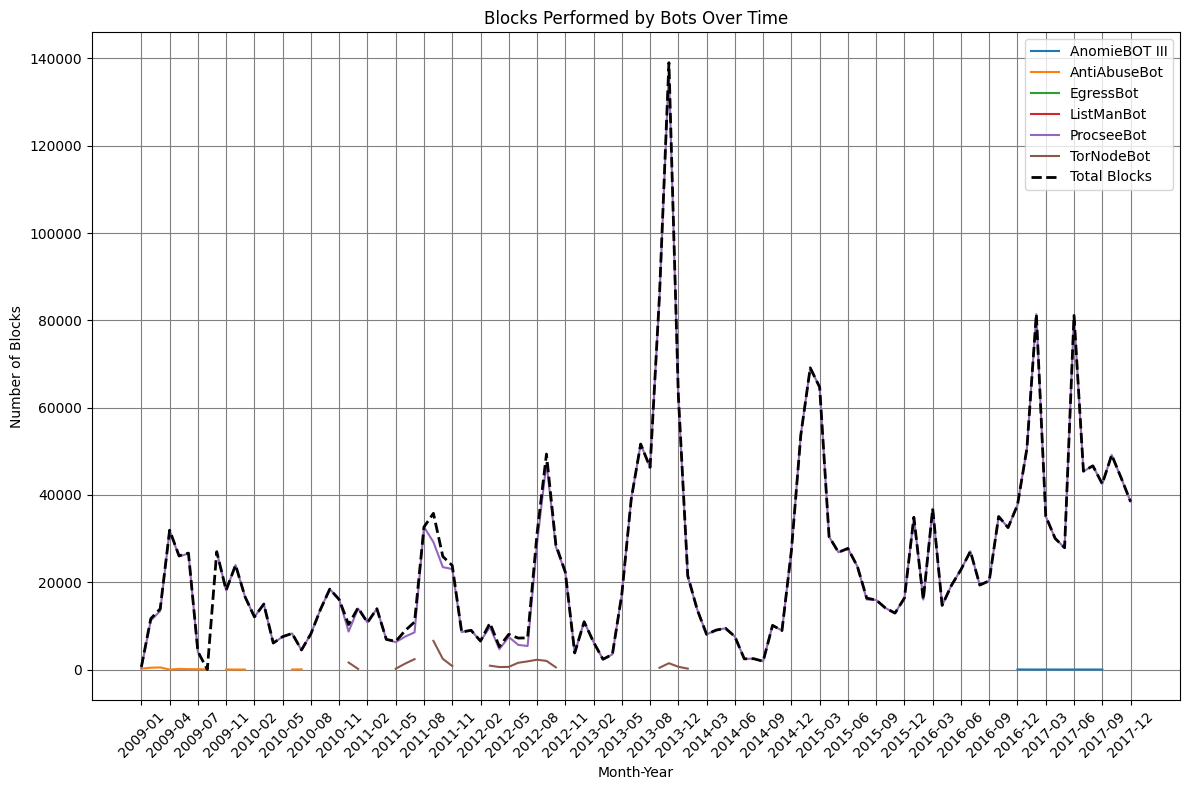

In [64]:
# Filter the DataFrame to include only rows where the user is identified as a bot
# Exclude specific bot users like 'NinjaRobotPirate' and 'Water Bottle'
bot_entries = df_ac_block[df_ac_block['administrator'].str.lower().str.contains("bot") & ~df_ac_block['administrator'].isin(['NinjaRobotPirate', 'Water Bottle'])]

# Convert 'timestamp' column to datetime type
bot_entries['timestamp'] = pd.to_datetime(bot_entries['timestamp'])

# Extract month and year from the 'timestamp' column
bot_entries['month_year'] = bot_entries['timestamp'].dt.to_period('M')

# Group by both 'month_year' and 'user', count the number of blocks
blocks_by_bot = bot_entries.groupby(['month_year', 'administrator']).size().unstack()

# Calculate the total accumulation of blocks over time
total_blocks_accumulation = bot_entries.groupby('month_year').size()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each bot separately
for bot in blocks_by_bot.columns:
    ax.plot(blocks_by_bot.index.astype(str), blocks_by_bot[bot], label=bot)

# Plot the total accumulation
ax.plot(total_blocks_accumulation.index.astype(str), total_blocks_accumulation, label='Total Blocks', linewidth=2, linestyle='--', color='black')

# Customize the plot
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Blocks')
ax.set_title('Blocks Performed by Bots Over Time')
ax.legend()

# Set x-axis ticks for every 3 months (adjust as needed)
plt.xticks(blocks_by_bot.index[::3].astype(str), rotation=45)

plt.tight_layout()

# Show the plot
plt.show()

In [65]:
# get unique administrators
df_ac_block_monthly_ad = df_ac_block.groupby(pd.PeriodIndex(df_ac_block['timestamp'], freq="M"))['administrator'].apply(lambda x: len(x.unique()))
df_ac_block_monthly_ad = df_ac_block_monthly_ad.to_frame()
df_ac_block_monthly_ad = df_ac_block_monthly_ad.reset_index()

In [66]:
df_ac_block_monthly_ad['timestamp'] = df_ac_block_monthly_ad['timestamp'].dt.to_timestamp()

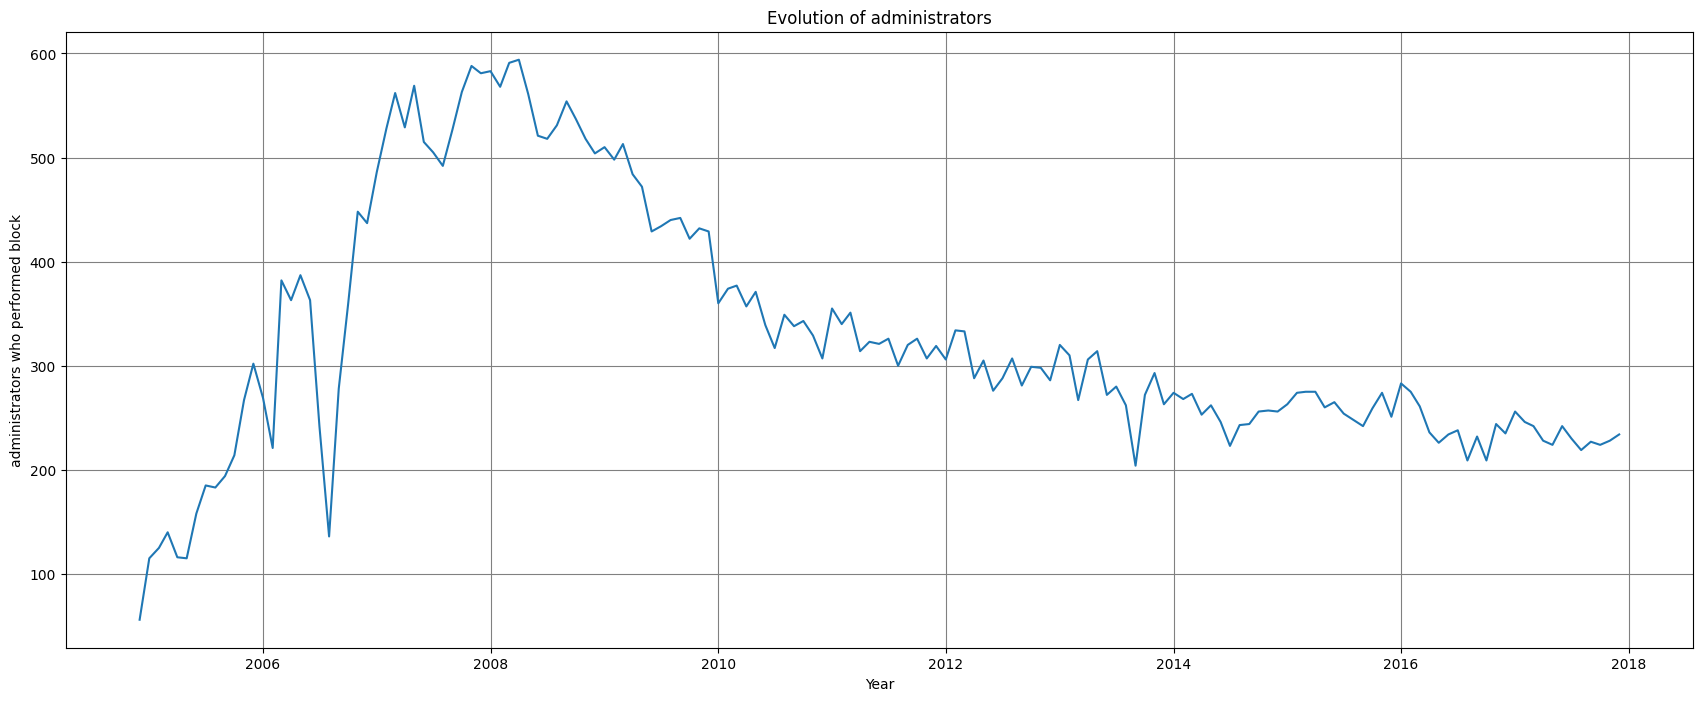

In [67]:
x1 = df_ac_block_monthly_ad['timestamp']
y1 = df_ac_block_monthly_ad['administrator']
title = "Evolution of administrators"
xlabel = "Year"
ylabel = "administrators who performed block"
show_plot_1(x1, y1, title, xlabel, ylabel)

## Exclude ProcseeBot : check the percentage of blocked users

In [68]:
# exclude the blocks done by ProcseeBot
df_ac_block_nop = df_ac_block [df_ac_block['administrator'] != 'ProcseeBot']

In [69]:
# get unique users
df_ac_block_monthly = df_ac_block_nop.groupby(pd.PeriodIndex(df_ac_block_nop['timestamp'], freq="M"))['users'].apply(lambda x: len(x.unique()))
df_ac_block_monthly = df_ac_block_monthly.to_frame()
df_ac_block_monthly = df_ac_block_monthly.reset_index()

In [70]:
df_ac_block_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   timestamp  157 non-null    period[M]
 1   users      157 non-null    int64    
dtypes: int64(1), period[M](1)
memory usage: 2.6 KB


In [71]:
df_ac_block_monthly['timestamp'] = df_ac_block_monthly['timestamp'].dt.to_timestamp()

In [72]:
df_ac_block_monthly.head()

,timestamp,users
0,2004-12-01,194
1,2005-01-01,957
2,2005-02-01,1209
3,2005-03-01,721
4,2005-04-01,630


In [73]:
wiki_data_full.head()

,month,edits,editors
0,2004-01-01T00:00:00.000Z,218853,14858
1,2004-02-01T00:00:00.000Z,310206,19883
2,2004-03-01T00:00:00.000Z,440685,26881
3,2004-04-01T00:00:00.000Z,405181,26519
4,2004-05-01T00:00:00.000Z,420408,28361


In [74]:
wiki_data_full.dtypes

month      object
edits       int64
editors     int64
dtype: object

In [75]:
wiki_data_full['month'] = pd.to_datetime(wiki_data_full['month'])
wiki_data = wiki_data_full[(wiki_data_full['month'] >= '2005-01-01') & (wiki_data_full['month'] <= '2017-12-31')]
wiki_data['month'] = wiki_data['month'].dt.date
wiki_data.reset_index(drop=True, inplace=True)

/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_34102/3636099343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wiki_data['month'] = wiki_data['month'].dt.date


In [76]:
df_ac_block_monthly = df_ac_block_monthly[(df_ac_block_monthly['timestamp'] >= '2005-01-01')&(df_ac_block_monthly['timestamp'] <= '2017-12-31')]
block_vs_edits = df_ac_block_monthly.copy()
block_vs_edits.reset_index(drop=True, inplace=True)

In [77]:
wiki_data

,month,edits,editors
0,2005-01-01,800186,80201
1,2005-02-01,789780,75824
2,2005-03-01,1024707,92355
3,2005-04-01,1294737,113549
4,2005-05-01,1365329,125997
...,...,...,...
151,2017-08-01,4686591,399409
152,2017-09-01,4666223,398494
153,2017-10-01,4696462,436203
154,2017-11-01,4622820,434451


In [78]:
df_ac_block_monthly

,timestamp,users
1,2005-01-01,957
2,2005-02-01,1209
3,2005-03-01,721
4,2005-04-01,630
5,2005-05-01,597
...,...,...
152,2017-08-01,10552
153,2017-09-01,10958
154,2017-10-01,12985
155,2017-11-01,11939


Check the equality of lenght of time frame from 2005 to 2017 for 12 month. from wiki data (edits and editors and data about blocking)



In [79]:
if len(wiki_data) != len(df_ac_block_monthly):
    print("data time frame ERROR")
else:
    print(len(wiki_data))

156


In [80]:
df1 = wiki_data
df4 = block_vs_edits
result = pd.concat([df1, df4], axis=1, join="inner")
result = result.drop(columns = 'timestamp')

In [82]:
result['%_bl_users'] = result['users']*100/result['editors']

# deactivate this line if you want to get more procise data
#result['%_bl_users'] = result['%_bl_users'].round(0)

In [83]:
result.head()

,month,edits,editors,users,%_bl_users
0,2005-01-01,800186,80201,957,1.193252
1,2005-02-01,789780,75824,1209,1.594482
2,2005-03-01,1024707,92355,721,0.780683
3,2005-04-01,1294737,113549,630,0.554827
4,2005-05-01,1365329,125997,597,0.473821


In [86]:
# the part with proxybot included inside
df_ac_block_monthly_wp = df_ac_block.groupby(pd.PeriodIndex(df_ac_block['timestamp'], freq="M"))['users'].apply(lambda x: len(x.unique()))
df_ac_block_monthly_wp = df_ac_block_monthly_wp.to_frame()
df_ac_block_monthly_wp = df_ac_block_monthly_wp.reset_index()

df_ac_block_monthly_wp['timestamp'] = df_ac_block_monthly_wp['timestamp'].dt.to_timestamp()
df_ac_block_monthly_wp = df_ac_block_monthly_wp.rename(columns={"title": "blocked_people"})

df_ac_block_monthly_wp = df_ac_block_monthly_wp[(df_ac_block_monthly_wp['timestamp'] >= '2005-01-01')&(df_ac_block_monthly_wp['timestamp'] <= '2017-12-31')]


block_vs_edits_wp = df_ac_block_monthly_wp.copy()
block_vs_edits_wp.reset_index(drop=True, inplace=True)

df1 = wiki_data
df7 = block_vs_edits_wp
result_wp = pd.concat([df1, df7], axis=1, join="inner")
result_wp = result_wp.drop(columns = 'timestamp')
result_wp['%_bl_users'] = result_wp['users']*100/result['editors']

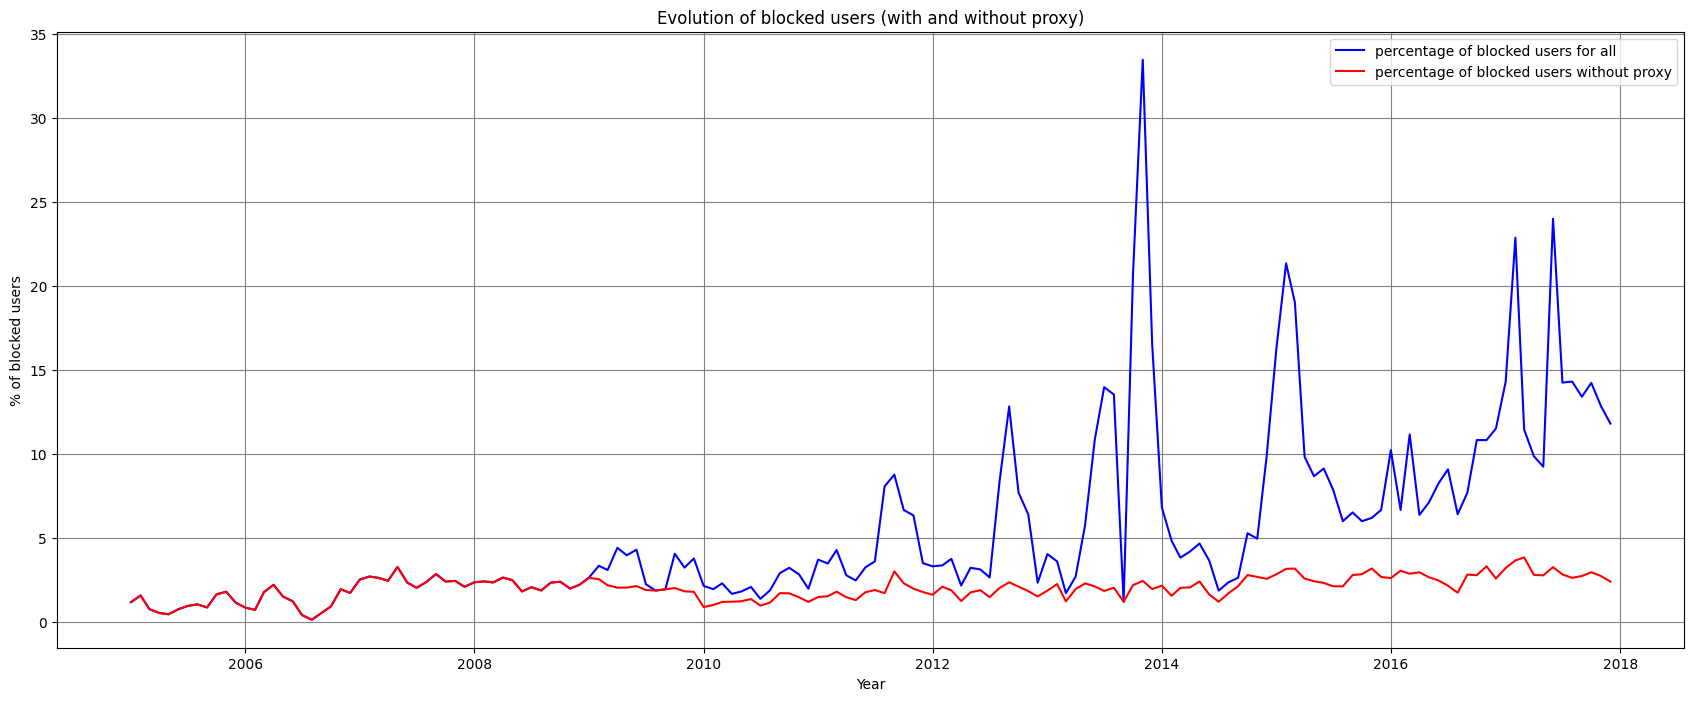

In [87]:
#show_plot_1(x1, y1, title, xlabel, ylabel)
x1 = result_wp['month']
y1 = result_wp['%_bl_users']


x2 = result['month']
y2 = result['%_bl_users']


title = "Evolution of blocked users (with and without proxy)"
xlabel = "Year"
ylabel = "% of blocked users"
legend_1 = "percentage of blocked users for all"#Blue
legend_2 = "percentage of blocked users without proxy" #Red

show_plot_2(x1, y1, x2, y2, title, xlabel, ylabel, legend_1, legend_2)

## Chaek the correlation between the number of blocking events and 